## Titanic Data EDA using Seaborn

## What is EDA?

Exploratory Data Analysis (EDA) is a method used to analyze and summarize datasets. Majority of the EDA techniques involve the use of graphs.

## Titanic Dataset –
It is one of the most popular datasets used for understanding machine learning basics. It contains information of all the passengers aboard the RMS Titanic, which unfortunately was shipwrecked. This dataset can be used to predict whether a given passenger survived or not.

### This is our dataset which have following features:

   * PassengerId : Id of every passenger.
   * Survived: This feature have value 0 and 1.
       * 0 - Not Survived 
       * 1 - Survived.
   * Pclass: There are 3 classes of passengers. Class1, Class2 and Class3.
   * Name: Name of passenger.
   * Sex: Gender of passenger.
   * Age: Age of passenger.
   * SibSp: Indication that passenger have siblings and spouse.
   * Parch: Whether a passenger is alone or have family.
   * Ticket: Ticket no of passenger.
   * Fare: Indicating the fare.
   * Cabin: The cabin of passenger.
   * Embarked: The embarked category.
   

## Objective

To predict whether the passenger will survive this disaster or not based on the given attributes.  

## 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Dataset Preparation

First we have training dataset in which data of 891 people. Out data set have 12 columns representing features.


In [3]:
train = pd.read_csv("train.csv")
train.shape

(891, 12)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Observations:

*    There are missing values in coloumns Age,Cabin and Embarked
*    The dataset is not completely balanced as number of people who survived 342 and who did not are 549.

## 3. High Level Statistics

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Observations : 

1. The age of passengers vary with a minimum value of 4 months to the maximum value of 80 years and the mean age is around 29 years.

2. The age of 75% percent of passengers was less than or equal to 38.



In [10]:
# Checking the stats when output is 0 .i.e passengers who didnt survive

status_0 = train[train["Survived"] == 0]
status_0.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [11]:
# Checking the stats when output is 1 .i.e passengers who survived

status_1 = train[train["Survived"] == 1]
status_1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


## Observations :

1. The mean age of people who survived the disaster was around 28 years  and for those who didnt was around 30. There is not much difference in the ages and does not play that significant role in determining whether a passenger survuved or not.
2. The mean fair paid by people who did not survived is around 22 and for people who did survive is around 48.From this observation we can say that passengers who paid more and bought tickets which had higher fares had more chance of surviving than the people who bough t cheaper tickets.  

In [34]:
train.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Doharr, Mr. Tannous",male,1601,G6,S
freq,1,577,7,4,644


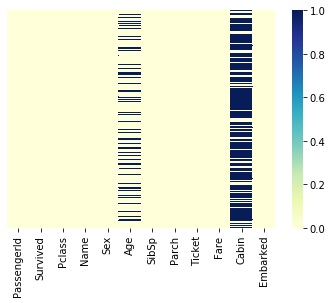

In [15]:
#analyzing the heatmap for checking in which coloumns the null values are more

sns.heatmap(train.isnull(),yticklabels=False,cbar = True,cmap="YlGnBu")

In [16]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Observation :

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement. The Cabin column has too many of null values which makes it not at all usefull. These coloumns needs to be filled up with appropriate values later on

## Features: The titanic dataset has roughly the following types of features:

  *  Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority.
    Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
  * Binary: A subtype of categorical features, where the variable has only two categories.
    Eg: Sex (Male/Female)
  *  Ordinal: They are similar to categorical features but they have an order(i.e can be sorted).
    Eg. Pclass (1, 2, 3)
  * Continuous: They can take up any value between the minimum and maximum values in a column.
    Eg. Age, Fare
  * Count: They represent the count of a variable.
    Eg. SibSp, Parch
    
  * Useless: They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might fall into this category.

## Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## 4.  Uni-variate Analysis 

We perform uni-variate analysis to describe and find patterns using only a single feature.

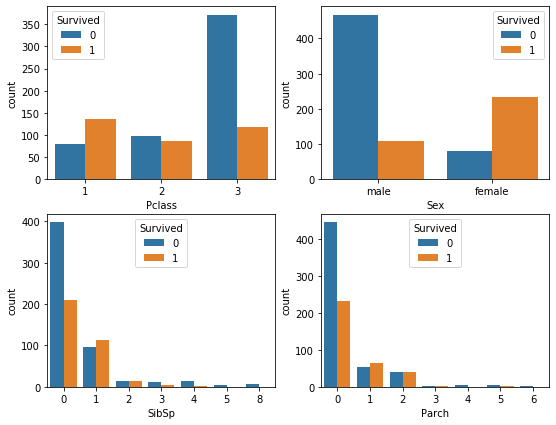

In [32]:
fig , axes = plt.subplots(2, 2, figsize = (9,7) )
sns.countplot('Pclass' , hue='Survived',data = train, ax = axes[0,0])
sns.countplot('Sex' , hue='Survived',data = train, ax = axes[0,1])
sns.countplot('SibSp' , hue='Survived',data = train, ax = axes[1,0])
sns.countplot('Parch' , hue='Survived',data = train, ax = axes[1,1])



## Observation :

We have plotted 4 bar graphs for 4 features :

1. Pclass - From this feature we can observe that the most number of passengers that survived belonged to class 1 and most number of passengers that did not survive belonged to class 3. Which means during evacuation people with higher classes were given more priority.
2. Sex - From the graph we can understand that the count of Female survivors were more thsn Male survivors. Sex played an important role in deciding who has higher chances of surviving.
3. 

IndexError: too many indices for array

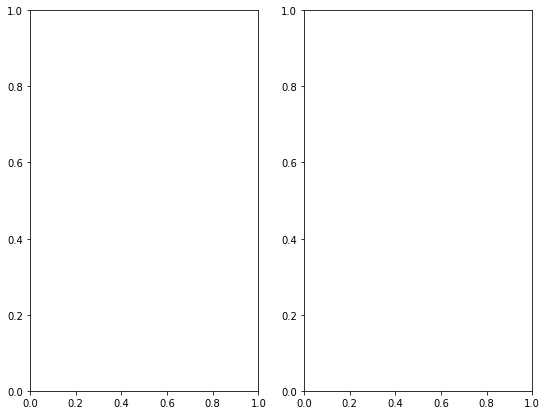

In [37]:
fig , axes = plt.subplots(1, 2, figsize = (9,7) )
sns.distplot(train['Fare'] , kde = True , ax = axes[0,0])
sns.distplot(train['Age'].dropna() , kde = True , ax = axes[0,1])

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement. The Cabin column has too many of null values which makes it not at all usefull. These coloumns needs to be filled up with appropriate values later on.

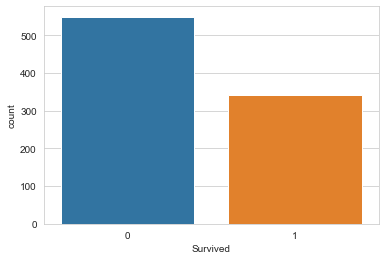

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

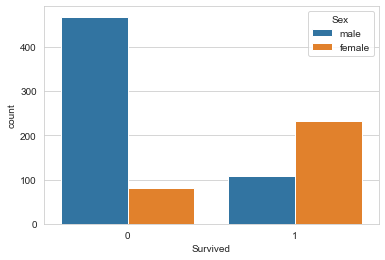

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

## Observation :

We can observe from the graph that the survival rate of men is around 20% and that of women is around 75%. Therefore,a passenger's gender plays an important role in determining if one is going to survive or not.

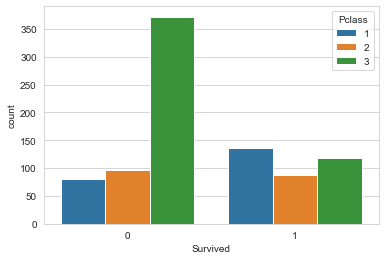

In [9]:

sns.countplot(x='Survived',hue='Pclass',data=train)

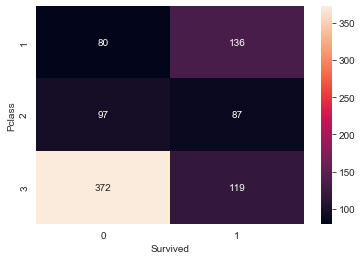

In [10]:
combine  = train.groupby(['Pclass','Survived'])
pclass_survived = combine.size().unstack() 

sns.heatmap(pclass_survived, annot = True, fmt ="d") 

## Observation :

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

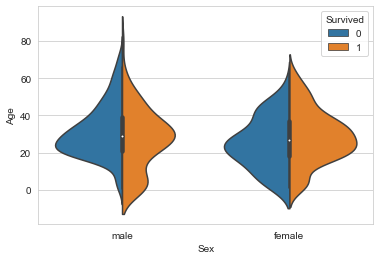

In [11]:

# Violinplot Displays distribution of data  
# across all levels of a category. 
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data = train, split = True) 


## Observation

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –

    Good for children.
    High for women in the age range 20-50.
    Less for men as the age increases.

Since Age column is important, the missing values need to be filled, either by using the Name column(ascertaining age based on salutation – Mr, Mrs etc.) or by using a regressor.
After this step, another column – Age_Range (based on age column) can be created and the data can be analyzed again. 